<a href="https://colab.research.google.com/github/scsanjay/ml_from_scratch/blob/main/05.%20Logistic%20Regression/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import *
from sklearn.metrics import accuracy_score, confusion_matrix, fbeta_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Custom implementation of Logistic Regression

**Gradient calculations https://i.imgur.com/f9XpzOY.jpeg**

In [ ]:
class LogisticRegression():
  """
  SGD implementation of Logistic Regression

  Parameters
  ----------
  penalty : {'l1', 'l2'}, default l2

  alpha : float, default = 0.0001
    multiplier for the regularisation term
  
  eta0 : float, default = 0.0
    initial learning rate

  epoch : int, default = 1000

  Attributes
  ----------
  weights : array of size n_features

  bias : float
  """

  def __init__ (self, penalty='l2', alpha=0.0001, eta0=0.0, epoch=1000):
    self.penalty = penalty
    self.alpha = alpha
    self.eta0 = eta0
    self.epoch = epoch

  def fit(self, X_train, y_train):
    """
    It will find a hyperplane that best separate the data.

    Parameters
    ----------
    X_train : array of shape (n_samples, n_features)

    Y_train : array of shape (n_samples)

    Returns
    -------
    self : object
    """

    # initialize weights and bias
    w = np.random.normal(size=len(X_train[0]))
    b = 0

    n = len(y_train)

    # epoch iterations
    for j in range(self.epoch):
      
      # loop over all training data
      for i in range(n):
        x = X_train[i]
        y = y_train[i]

        # weight gradient
        dw =  (-y*x)*np.exp(-y*(np.dot(w,x)+b))/(1+np.exp(-y*(np.dot(w,x)+b)))
        
        # regularization term based on penalty
        if (self.penalty=='l1'):
          # L1 regulariser
          dw += self.alpha*(w/np.dot(w, w))
        else:
          # L2 regulariser
          dw += 2*self.alpha*w

        # bias gradient
        db =  (-y)*np.exp(-y*(np.dot(w,x)+b))/(1+np.exp(-y*(np.dot(w,x)+b))) 

        # update weights and bias based on gradient and learning rate
        w = w-self.eta0*dw
        b = b-self.eta0*db
    
    # set weights and bias attributes
    self.weights = w
    self.bias = b
    return self

  def predict (self, X_test):
    """
    It will predict the output classes for the test data.

    Parameters
    ----------
    X_test : array of shape (n_samples, n_features)

    Returns
    -------
    predicted : array of shape (n_samples,)
    """
    # calculate predictions
    predictions = np.dot(self.weights, X_test.T)+self.bias

    return np.sign(predictions) 


## Validating the implementation

In [ ]:
data = load_breast_cancer()
independent_variables = data.data
dependent_variable = data.target
# y should be {-1,1}
dependent_variable[dependent_variable==0] = -1

X_train, X_test, y_train, y_test = train_test_split(independent_variables, dependent_variable, train_size=.8)

# standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### With L2 regularizer

In [ ]:
# tune the model
model = LogisticRegression(alpha=0.0001, eta0=0.0001, epoch = 1100)
# fit the model
model.fit(X_train, y_train)
# predict the classes
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9824561403508771

**Accuracy 98.26% which is very good. But it's imbalanaced data, so we need to look at confusion matrix.**

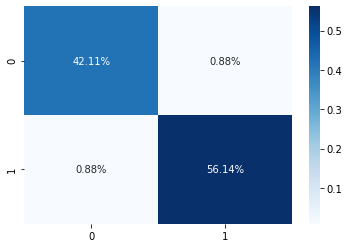

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

**Confusion matrix also looks good, both classes are well classified.**

### Now with L1 regularizer

In [ ]:
model2 = LogisticRegression(alpha=0.0001, eta0=0.0001, epoch = 1100, penalty='l1')
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred2)

0.9649122807017544

**96.49% accuracy is also good**